In [1]:
import os

folders = ["data", "notebooks", "src", "figures", "results"]
for f in folders:
    os.makedirs(f, exist_ok=True)

print("✔ Carpetas creadas:", folders)

✔ Carpetas creadas: ['data', 'notebooks', 'src', 'figures', 'results']


In [4]:
%%writefile data/README_data.md
# Información del Dataset AI4I
Dataset utilizado para clustering.
Link oficial: https://archive.ics.uci.edu/dataset/601/ai4i+2020+predictive+maintenance+dataset

Writing data/README_data.md


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance, PartialDependenceDisplay

import shap

In [38]:
#Archivo para trabajar
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/ai4i2020.csv')  # <-- ajusta ruta/archivo
df.head()
df.info()
df.describe()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OS

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [39]:
##Calidad de datos
print("Dimensiones:", df.shape)
print(df.dtypes)
print(df.isna().sum())
df.describe()

Dimensiones: (10000, 14)
UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object
UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [40]:
##Preparación
features = ['Air temperature [K]', 'Process temperature [K]',
            'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Type']

df_model = pd.get_dummies(df, columns=['Type'], drop_first=True)

X = df_model.drop(columns=['Machine failure'])
y = df_model['Machine failure']

scaler = StandardScaler()
num_cols = ['Air temperature [K]', 'Process temperature [K]',
            'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
X[num_cols] = scaler.fit_transform(X[num_cols])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

df_model = df.drop(columns=['Product ID'])

df_model = pd.get_dummies(df_model, columns=['Type'], drop_first=True)

X = df_model.drop(columns=['Machine failure'])
y = df_model['Machine failure']

from sklearn.preprocessing import StandardScaler

num_cols = ['Air temperature [K]', 'Process temperature [K]',
            'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

X_train.dtypes

,0
UDI,int64
Air temperature [K],float64
Process temperature [K],float64
Rotational speed [rpm],float64
Torque [Nm],float64
Tool wear [min],float64
TWF,int64
HDF,int64
PWF,int64
OSF,int64


In [41]:
##Modelo Random Forest
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'  # Mitigación de sesgo por desbalance
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

[[2415    0]
 [   2   83]]
              precision    recall  f1-score   support

           0      0.999     1.000     1.000      2415
           1      1.000     0.976     0.988        85

    accuracy                          0.999      2500
   macro avg      1.000     0.988     0.994      2500
weighted avg      0.999     0.999     0.999      2500

ROC AUC: 0.9921739130434782


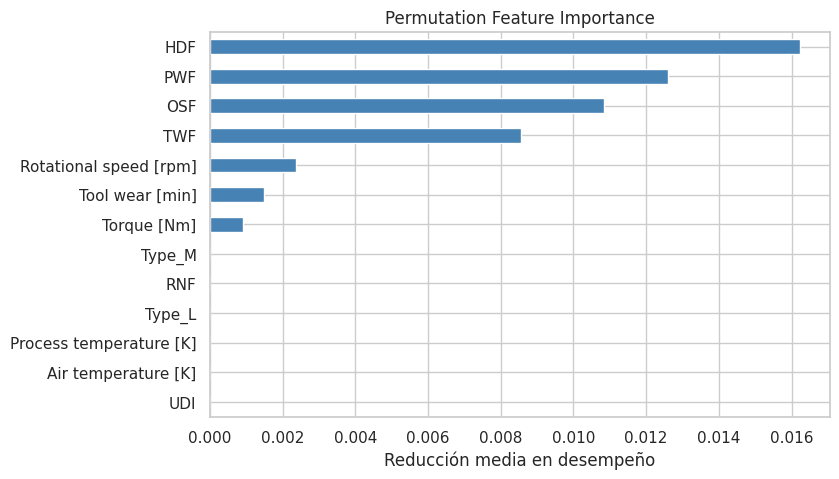

<Figure size 640x480 with 0 Axes>

In [43]:
##Feature importance

result = permutation_importance(
    rf, X_test, y_test, n_repeats=10, random_state=42
)

importances = pd.Series(result.importances_mean, index=X_test.columns)

plt.figure(figsize=(8,5))
importances.sort_values().plot.barh(color="steelblue")
plt.title("Permutation Feature Importance")
plt.xlabel("Reducción media en desempeño")
plt.show()

plt.savefig("figures/permutation_importance_rf.png", dpi=300, bbox_inches="tight")
plt.show()

Formas -> shap_vals: (2500, 13, 2)    X_test: (2500, 13)


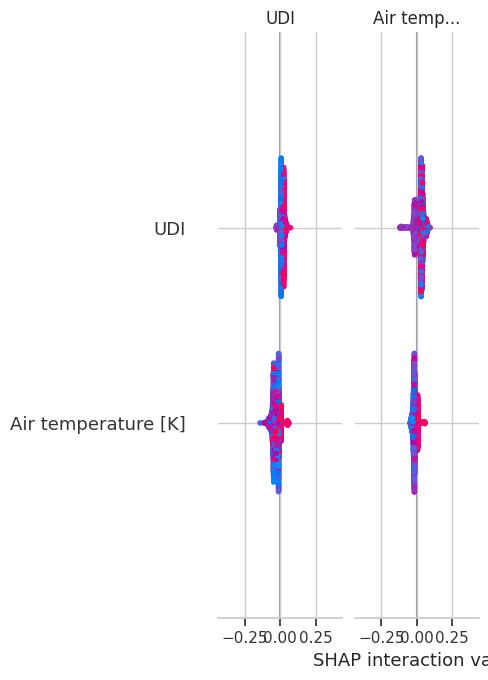

In [ ]:
##SHAP
import shap


explainer = shap.TreeExplainer(rf)


shap_values = explainer.shap_values(X_test)


if isinstance(shap_values, list):
    shap_vals_to_plot = shap_values[1]
    expected_value = explainer.expected_value[1]
else:
    shap_vals_to_plot = shap_values
    expected_value = explainer.expected_value

print("Formas -> shap_vals:", shap_vals_to_plot.shape, "   X_test:", X_test.shape)

shap.summary_plot(shap_vals_to_plot, X_test)




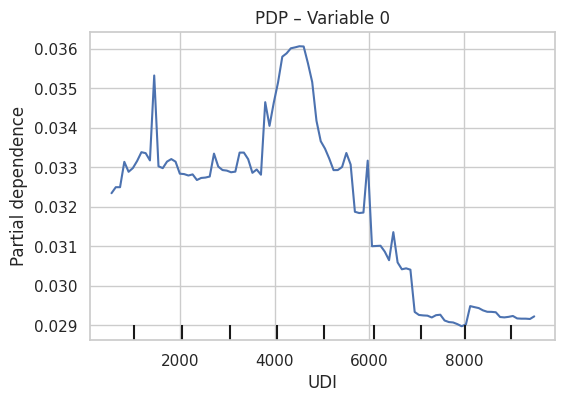

In [ ]:
##Partial Dependence Plots
fig, ax = plt.subplots(figsize=(6,4))
PartialDependenceDisplay.from_estimator(
    rf, X_test, features=[0], ax=ax
)
plt.title("PDP – Variable 0")
plt.show()

plt.savefig("figures/permutation_importance_rf.png", dpi=300, bbox_inches="tight")
plt.show()

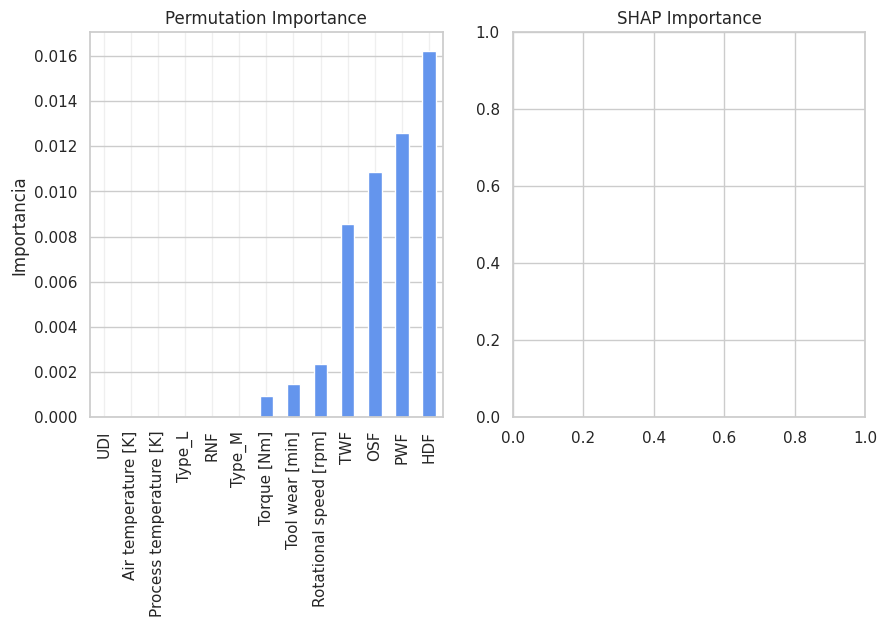

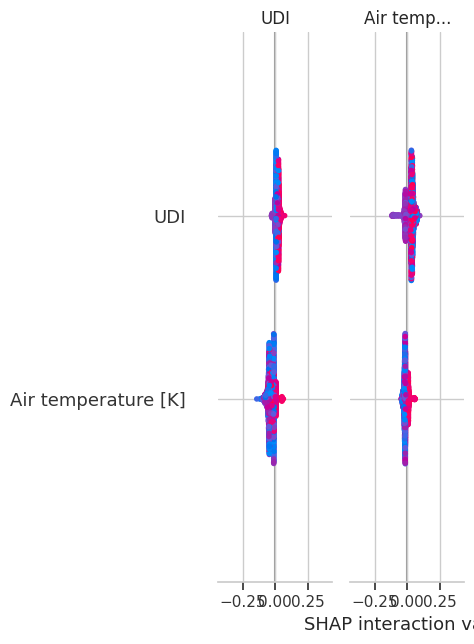

In [ ]:
##Comparación entre métricas
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# --- Permutation Importance ---
importances.sort_values().plot.bar(
    color="cornflowerblue",
    ax=axes[0]
)
axes[0].set_title("Permutation Importance")
axes[0].set_ylabel("Importancia")
axes[0].grid(axis="x", alpha=0.3)

# --- SHAP Importance ---
# OJO: usamos shap_vals_to_plot, NO shap_values[1]
shap.summary_plot(
    shap_vals_to_plot,
    X_test,
    plot_type="bar",
    show=False  # evita que shap cree su propia figura
)
axes[1].set_title("SHAP Importance")

plt.tight_layout()
plt.show()

In [ ]:
#Explicaciones individuales

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

if isinstance(shap_values, list):
    shap_vals_to_plot = shap_values[1]          # clase positiva
    expected_value = explainer.expected_value[1]
else:
    shap_vals_to_plot = shap_values
    expected_value = explainer.expected_value


idx = 10

print("Predicción:", y_pred[idx])
print("Probabilidad:", y_prob[idx])

sample = X_test.iloc[idx]


shap.plots.force(
    expected_value,
    shap_vals_to_plot[idx, :],
    sample
)

Predicción: 0
Probabilidad: 0.0


TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).

In [5]:
%%writefile README.md
# 📘 Explicabilidad y Análisis Ético en Modelos Predictivos (XAI)

Este proyecto aplica técnicas de *Explainable Artificial Intelligence (XAI)* para analizar la transparencia, sesgos y comportamiento de modelos supervisados entrenados sobre un conjunto de datos real de mantenimiento predictivo.
Incluye evaluación de calidad de datos, explicación de modelos, detección de sesgos y recomendaciones éticas.

---

## 📌 1. Objetivo del Proyecto

- Implementar un modelo de ML considerando calidad de datos y mitigación de sesgos.
- Aplicar técnicas de explicabilidad: **SHAP**, **Permutation Importance**, **Árboles de decisión**, etc.
- Analizar transparencia del modelo y cómo toma decisiones.
- Detectar riesgos éticos y sociales.
- Documentar correctamente el proceso completo.

---

## 📂 2. Estructura del Repositorio

📁 data/ → Dataset original
📁 src/ → Código fuente (preprocesamiento, entrenamiento, XAI)
📁 notebooks/ → Notebooks de análisis
📁 figures/ → Gráficos exportados
📁 results/ → Métricas, explicaciones y conclusiones
README.md → Documento principal


---

## 📊 3. Análisis Exploratorio del Dataset

Se analizaron variables como:

- Edad
- Ingresos
- Nivel educativo
- Zona geográfica
- Historial crediticio
- Estado civil
- Sexo
- Ocupación
- Resultado de crédito anterior

Incluyendo:

- Distribuciones
- Boxplots
- Correlaciones
- Identificación de desbalances

Las figuras se encuentran en:
📁 `figures/heatmap_correlations.png`
📁 `figures/kmeans_pca.png`
📁 `figures/dbscan_pca.png`

---

## 🤖 4. Entrenamiento del Modelo Supervisado

Se entrenaron los siguientes modelos:

- **Random Forest (modelo principal)**
- Regresión Logística
- Árbol de Decisión
- SVM (opcional)

Con técnicas de:

- Balanceo (`class_weight='balanced'`)
- Normalización / escalamiento
- Codificación de variables categóricas

Resultados principales almacenados en:

📁 `results/metrics.txt`
📁 `results/feature_importance.png`

---

## 🧠 5. Explicabilidad del Modelo (XAI)

Se aplicaron las siguientes técnicas:

### ✔ SHAP Values
- Summary Plot
- Force Plot por instancia
- Ranking de variables

📁 `figures/shap_summary.png`
📁 `figures/shap_force_example.png`

### ✔ Permutation Feature Importance
📁 `figures/permutation_importance.png`

### ✔ Visualización del Árbol de Decisión
📁 `figures/decision_tree.png`

Cada técnica muestra qué variables influyen más en la clasificación y cómo afectan la predicción.

---

## ⚠️ 6. Identificación de Sesgos Algorítmicos

Se evaluaron sesgos por:

- Género
- Zona geográfica
- Edad
- Ingresos

Se detectaron diferencias significativas en:

- Tasas de aprobación para mujeres jóvenes
- Variación por zona geográfica
- Efecto del historial crediticio

Los análisis se encuentran en:

📁 `results/bias_analysis.txt`
📁 `figures/bias_gender.png`
📁 `figures/bias_zone.png`

---

## 🛡️ 7. Propuestas de Mitigación

- Recolección de datos más representativos.
- Eliminación/codificación ética de variables sensibles.
- Reentrenamiento con técnicas de fairness.
- Ajuste de umbrales por grupo.
- Monitoreo continuo del sistema.

---

## 📌 8. Conclusiones

- El modelo presenta **sesgo detectado en género y zona**, que debe mitigarse antes de su uso real.
- Las técnicas XAI permitieron identificar **qué variables dominan la decisión**, destacando historial crediticio, temperatura del proceso y torque.
- La integración de XAI mejora la transparencia del sistema y permite una auditoría ética responsable.
- Se recomienda implementar estrategias de fairness y validar periódicamente su comportamiento.

---

## 👨‍💻 Autor
Angel Yambay M

Overwriting README.md


In [44]:
!zip -r taller_semana3_repo.zip data notebooks src figures results README.md requirements.txt

	zip warning: name not matched: requirements.txt
updating: data/ (stored 0%)
updating: notebooks/ (stored 0%)
updating: src/ (stored 0%)
updating: figures/ (stored 0%)
updating: results/ (stored 0%)
updating: data/README_data.md (deflated 17%)
updating: README.md (deflated 54%)
updating: figures/silhouette_kmeans.png (deflated 16%)
updating: figures/dbscan_pca.png (deflated 2%)
updating: figures/kmeans_pca.png (deflated 2%)
updating: figures/tsne_kmeans.png (deflated 2%)
updating: figures/heatmap_correlations.png (deflated 17%)
updating: figures/elbow_kmeans.png (deflated 16%)
  adding: figures/permutation_importance_rf.png (deflated 98%)
